In [22]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 120
from scipy.stats import iqr, skew, kurtosis

<IPython.core.display.Javascript object>


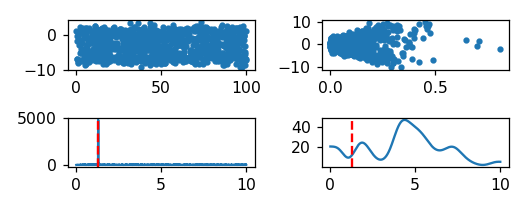

In [2]:
from scipy.signal import lombscargle
f = np.linspace(0.01, 10, 10000)

def create_signal(P, A, M, N=1000, T=100.0):    
    t = np.sort(np.random.rand(N))*T
    s = M + A*(np.sin(2.0*np.pi*t/P) + np.random.randn(N)*0.2)
    return t, s

fig, ax = plt.subplots(2, 2, figsize=(5, 2), tight_layout=True)
P, A, M = 0.1+np.random.rand()*10, 0.1+np.random.rand()*10, np.random.randn()*10
t, s = create_signal(P, A, M)
pgrams = lombscargle(t, s-np.mean(s), 2.*np.pi*f)
dt = t[1:] - t[:-1]
ds = s[1:] - s[:-1]
pgramds = lombscargle(dt, ds-np.mean(ds), 2.*np.pi*f)
ax[0,0].plot(t, s, '.')
ax[0,1].plot(dt, ds, '.')
ax[1,0].plot(f, pgrams)
ax[1,0].axvline(1/P, ls='--', c='r')
ax[1,1].plot(f, pgramds)
ax[1,1].axvline(1/P, ls='--', c='r')

In [23]:
NN = 100
periods = np.zeros(shape=(NN, 2))
stddev = np.zeros(shape=(NN, 2))
iqrs = np.zeros(shape = (NN, 2))
sks = np.zeros(shape = (NN, 2))
ampl = np.zeros(shape = (NN, 2))
median = np.zeros(shape = (NN, 2))
krts = np.zeros(shape = (NN, 2))

lcs = []

for k in range(NN):
    P, A, M = 0.1+np.random.rand()*10, 0.1+np.random.rand()*10, np.random.randn()*10
    
    
    t, s = create_signal(P, A, M)
    pgrams = lombscargle(t, s, f, normalize=True)
    dt = t[1:] - t[:-1]
    ds = s[1:] - s[:-1]
    
    lc = {
        "t": t,
        "s": s,
        "dt": dt,
        "ds": ds,
    }
    
    lcs.append(lc)
    
    pgramds = lombscargle(dt, ds, f, normalize=True)
    stddev[k, 0] = np.std(s)
    stddev[k, 1] = np.std(ds)
    periods[k, 0] = f[np.argmax(pgrams)]
    periods[k, 1] = f[np.argmax(pgramds)]
    
    iqrs[k, 0] = iqr(s)
    iqrs[k, 1] = iqr(ds)
    
    # skewness
    sks[k, 0] = skew(s)
    sks[k, 1] = skew(ds)
    
    
    # amplitude
    # class 88
    ampl[k, 0] = np.amax(s) - np.amin(s)
    ampl[k, 1] = np.amax(ds) - np.amin(ds)   
    
    # median
    # class 65
    median[k, 0] = np.median(s)
    median[k, 1] = np.median(ds)
    
    # kurtosis
    krts[k, 0] = kurtosis(s)
    krts[k, 1] = kurtosis(ds)

In [14]:
print(dt.shape)
print(ds.shape)
print(t.shape)
print(s.shape)
print(stddev.shape)
print(ampl.shape)

(999,)
(999,)
(1000,)
(1000,)
(100, 2)
(100, 2)


<IPython.core.display.Javascript object>


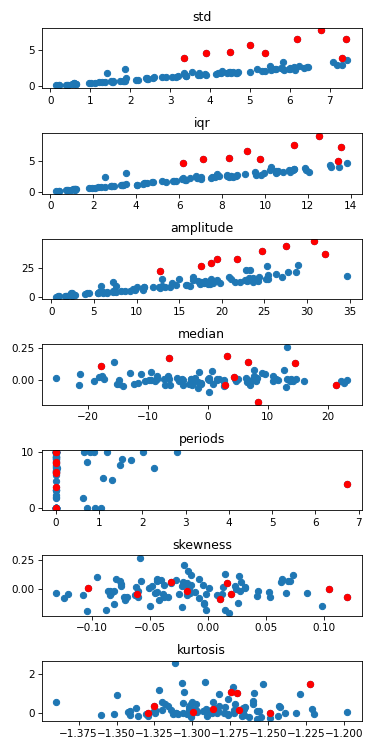

In [41]:
# get outliers
# select outlier
# idx = np.where((stddev[:, 1]> 4) & (stddev[:,1 > 3]))
# idx =  ((stddev[:, 0] > 1) & (stddev[:, 0] < 2) & (stddev[:, 1] > 1.05)) | ((stddev[:, 0] > 2) & (stddev[:, 0] < 3) & (stddev[:, 1] > 1.7)) | ((stddev[:, 0] > 3) & (stddev[:, 0] < 4) & (stddev[:, 1] > 2.2)) | ((stddev[:, 0] > 4) & (stddev[:, 0] < 6) & (stddev[:, 1] > 2.8)) | ((stddev[:, 0] > 6) & (stddev[:, 1] > 3.6))
# idx =  ((stddev[:, 0] > 3) & (stddev[:, 0] < 4) & (stddev[:, 1] > 2.2)) | ((stddev[:, 0] > 4) & (stddev[:, 0] < 6) & (stddev[:, 1] > 2.8) | ((stddev[:, 0] > 6) & (stddev[:, 1] > 3.6)))
idx =  (stddev[:, 1] > 3.7)

featuresArrays = [stddev, iqrs, ampl, median, periods, sks, krts]
features = ["std", "iqr", "amplitude", "median", "periods", "skewness", "kurtosis"]


fig, ax = plt.subplots(
    len(features), 
    1, 
    figsize=(5, 10), 
    tight_layout=True
)


for i,(array, name) in enumerate(zip(featuresArrays, features)):
    
#     print(idx)
#     fig, ax = plt.subplots(figsize=(3, 3), tight_layout=True)
    ax[i].scatter(array[:, 0], array[:, 1])
    ax[i].scatter(array[idx, 0], array[idx, 1], c = "r")
    ax[i].set_title(name)
    
#     # std
#     fig, ax = plt.subplots(figsize=(3, 3), tight_layout=True)
#     ax.scatter(stddev[:, 0], stddev[:, 1])
#     ax.scatter(stddev[idx, 0], stddev[idx, 1], c = "r")
#     ax.set_title("std")


#     # iqr
#     fig, ax = plt.subplots(figsize=(5, 2), tight_layout=True)
#     ax.scatter(iqrs[:, 0], iqrs[:, 1])
#     ax.scatter(iqrs[idx, 0], iqrs[idx, 1], c = "r")
#     ax.set_title("iqr")

#     # amplitude
#     fig, ax = plt.subplots(figsize=(5, 2), tight_layout=True)
#     ax.scatter(ampl[:, 0], ampl[:, 1])
#     ax.scatter(ampl[idx, 0], ampl[idx, 1], c = "r")
#     ax.set_title("amplitude")


#     # median
#     fig, ax = plt.subplots(figsize=(5, 2), tight_layout=True)
#     ax.scatter(median[:, 0], median[:, 1])
#     ax.scatter(median[idx, 0], median[idx, 1], c = "r")
#     ax.set_title("median")


#     # period
#     fig, ax = plt.subplots(figsize=(5, 2), tight_layout=True)
#     ax.scatter(periods[:, 0], periods[:, 1])
#     ax.scatter(periods[idx, 0], periods[idx, 1], c = "r")
#     ax.set_title("period")


#     # skewness
#     fig, ax = plt.subplots(figsize=(5, 2), tight_layout=True)
#     ax.scatter(sks[:, 0], sks[:, 1])
#     ax.scatter(sks[idx, 0], sks[idx, 1], c = "r")
#     ax.set_title("skewness")


#     # kurtosis
#     fig, ax = plt.subplots(figsize=(5, 2), tight_layout=True)
#     ax.scatter(krts[:, 0], krts[:, 1])
#     ax.scatter(krts[idx, 0], krts[idx, 1], c = "r")
#     ax.set_title("kurtosis")

In [27]:
np.where(idx)[0]

array([ 2, 13, 27, 34, 49, 77, 84, 90, 91])

<IPython.core.display.Javascript object>


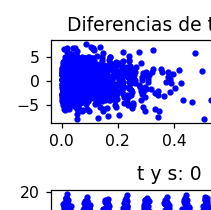

/home/leo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  after removing the cwd from sys.path.
/home/leo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  if __name__ == '__main__':


Text(0.5, 1.0, 't y s: 0')

In [28]:
i = 0

fig, ax = plt.subplots(2, 1, figsize=(3, 3), tight_layout=True)
ax[0].plot(lcs[idx[i]]["dt"], lcs[idx[i]]["ds"], '.', c = "b")
#     ax.scatter(lcs[idx[i]]["dt"][idx], lcs[idx[i]]["ds"], c = "r", linewidth = 2, zorder = 10)
ax[0].set_title(f"Diferencias de t y s: {i}")


ax[1].plot(lcs[idx[i]]["t"], lcs[idx[i]]["s"], '.', c = "b")
ax[1].set_title(f"t y s: {i}")


<IPython.core.display.Javascript object>


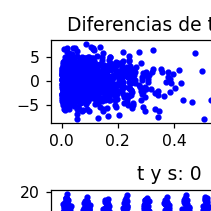

/home/leo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  import sys
/home/leo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  if sys.path[0] == '':


<IPython.core.display.Javascript object>


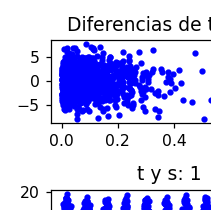

/home/leo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  import sys
/home/leo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  if sys.path[0] == '':


<IPython.core.display.Javascript object>


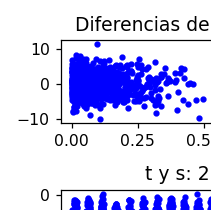

/home/leo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  import sys
/home/leo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  if sys.path[0] == '':


<IPython.core.display.Javascript object>


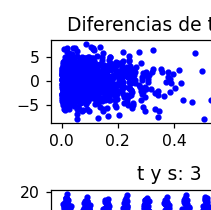

/home/leo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  import sys
/home/leo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  if sys.path[0] == '':


<IPython.core.display.Javascript object>


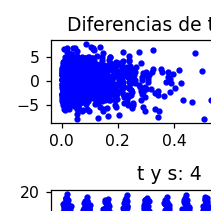

/home/leo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  import sys
/home/leo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  if sys.path[0] == '':


<IPython.core.display.Javascript object>


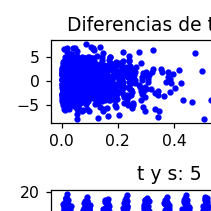

/home/leo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  import sys
/home/leo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  if sys.path[0] == '':


<IPython.core.display.Javascript object>


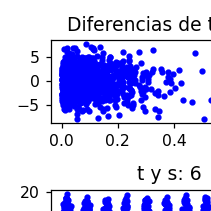

/home/leo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  import sys
/home/leo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  if sys.path[0] == '':


<IPython.core.display.Javascript object>


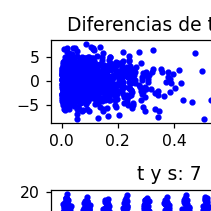

/home/leo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  import sys
/home/leo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  if sys.path[0] == '':


<IPython.core.display.Javascript object>


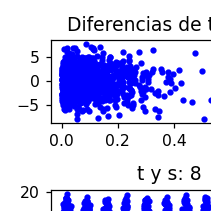

/home/leo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  import sys
/home/leo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  if sys.path[0] == '':


In [29]:
# for i in np.arange(np.where(idx)[0].shape[0]):
# fig, ax = plt.subplots(np.where(idx)[0].shape[0], tight_layout = True)

for i in np.arange(np.where(idx)[0].shape[0]):
    
    fig, ax = plt.subplots(2, 1, figsize=(3, 3), tight_layout=True)
    ax[0].plot(lcs[idx[i]]["dt"], lcs[idx[i]]["ds"], '.', c = "b")
#     ax.scatter(lcs[idx[i]]["dt"][idx], lcs[idx[i]]["ds"], c = "r", linewidth = 2, zorder = 10)
    ax[0].set_title(f"Diferencias de t y s: {i}")
    
    
    ax[1].plot(lcs[idx[i]]["t"], lcs[idx[i]]["s"], '.', c = "b")
    ax[1].set_title(f"t y s: {i}")
    